In [1]:
import numpy as np
import pylab as plt

In [2]:
# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

In [3]:
goal = 7

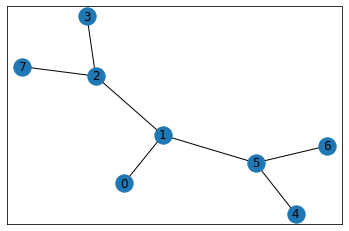

In [4]:
import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [5]:
# how many points in graph? x points
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [6]:
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


In [7]:
R

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

In [8]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

In [9]:
# learning parameter
gamma = 0.8

In [10]:
initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

In [11]:
available_act = available_actions(initial_state)

In [12]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

In [13]:
action = sample_next_action(available_act)

In [14]:
def update(current_state, action, gamma):

  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]

  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)

  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

In [15]:
update(initial_state, action, gamma)

max_value 0.0


0

In [16]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))

print("Trained Q matrix:")
print(Q/np.max(Q)*100)

max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 80.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 100.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 80.0
Score: 260.0
max_value 164.0
Score: 258.5365853658536
max_value 0.0
Score: 258.5365853658536
max_value 0.0
Score: 258.5365853658536
max_value 80.0
Score: 307.3170731707317
max_value 64.0
Score: 346.3414634146342
max_value 0.0
Score: 346.3414634146342
max_value 0.0
Score: 346.3414634146342
max_value 80.0
Score: 346.3414634146342
max_value 51.2
Score: 377.5609756097561
max_value 0.0
Score: 377.5609756097561
max_value 64

max_value 385.22256372269067
Score: 974.1931668260095
max_value 308.17805097815256
Score: 974.1931668260095
max_value 385.22256372269067
Score: 974.1931668260095
max_value 385.22256372269067
Score: 974.1931668260095
max_value 481.5282046533633
Score: 975.1521862130428
max_value 192.9780509781525
Score: 975.1521862130428
max_value 241.22256372269064
Score: 975.1521862130428
max_value 385.22256372269067
Score: 975.1521862130428
max_value 308.17805097815256
Score: 975.1521862130428
max_value 308.17805097815256
Score: 975.1521862130428
max_value 308.17805097815256
Score: 975.1521862130428
max_value 308.17805097815256
Score: 975.1521862130428
max_value 241.22256372269064
Score: 975.1521862130428
max_value 308.17805097815256
Score: 975.1521862130428
max_value 385.22256372269067
Score: 975.1521862130428
max_value 385.22256372269067
Score: 975.1521862130428
max_value 385.22256372269067
Score: 975.1521862130428
max_value 241.22256372269064
Score: 975.1521862130428
max_value 385.22256372269067
S

Score: 980.1221415688779
max_value 254.4132848617559
Score: 980.1221415688779
max_value 254.4132848617559
Score: 980.1221415688779
max_value 203.53062788940474
Score: 980.1221415688779
max_value 398.7306278894048
Score: 980.2654005537197
max_value 318.01660607719487
Score: 980.2654005537197
max_value 398.7306278894048
Score: 980.4086595385616
max_value 318.01660607719487
Score: 980.4086595385616
max_value 254.4132848617559
Score: 980.4086595385616
max_value 203.53062788940474
Score: 980.6514039295436
max_value 498.4132848617559
Score: 980.7309922544557
max_value 498.7306278894048
Score: 980.1705818364933
max_value 398.98450231152384
Score: 980.2214859534497
max_value 318.01660607719487
Score: 980.2214859534497
max_value 318.01660607719487
Score: 980.2214859534497
max_value 254.4132848617559
Score: 980.2214859534497
max_value 319.1876018492191
Score: 980.5557032963427
max_value 254.4132848617559
Score: 980.5557032963427
max_value 398.98450231152384
Score: 980.5557032963427
max_value 398

Score: 982.4332194673234
max_value 204.66370220746356
Score: 982.4332194673234
max_value 204.66370220746356
Score: 982.4332194673234
max_value 499.8637022074636
Score: 982.3730662198766
max_value 499.89096176597087
Score: 982.3249495263101
max_value 255.82962775932944
Score: 982.3249495263101
max_value 399.7337933739522
Score: 982.3249495263101
max_value 499.9127694127767
Score: 982.286459949639
max_value 255.82962775932944
Score: 982.286459949639
max_value 499.9302155302214
Score: 982.3047830996484
max_value 399.94417242417717
Score: 982.3468647829893
max_value 399.94417242417717
Score: 982.3468647829893
max_value 255.82962775932944
Score: 982.3468647829893
max_value 319.7870346991618
Score: 982.3468647829893
max_value 255.82962775932944
Score: 982.3468647829893
max_value 319.7870346991618
Score: 982.3468647829893
max_value 499.9302155302214
Score: 982.3468647829893
max_value 319.7870346991618
Score: 982.3468647829893
max_value 255.82962775932944
Score: 982.3468647829893
max_value 319

In [17]:
Q

matrix([[  0.        , 319.7870347 ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ],
        [255.82962776,   0.        , 399.73379337,   0.        ,
           0.        , 255.82962776,   0.        ,   0.        ],
        [  0.        , 319.7870347 ,   0.        , 319.95533794,
           0.        ,   0.        ,   0.        , 499.93021553],
        [  0.        ,   0.        , 399.94417242,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
           0.        , 255.82962776,   0.        ,   0.        ],
        [  0.        , 319.7870347 ,   0.        ,   0.        ,
         204.66370221,   0.        , 204.66370221,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
           0.        , 255.82962776,   0.        ,   0.        ],
        [  0.        ,   0.        , 399.94417242,   0.        ,
           0.     

Most efficient path:
[0, 1, 2, 7]


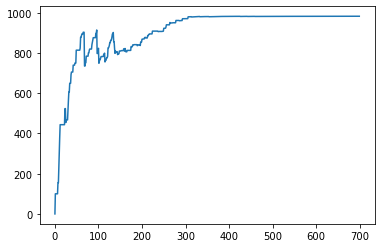

In [17]:
# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,]
        == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()


# Version 2.0, with Environmental Details

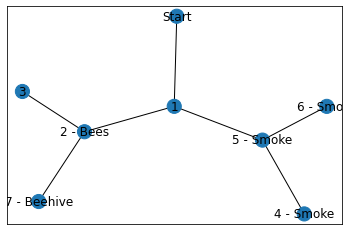

In [18]:
bees = [2]
smoke = [4,5,6]

G=nx.Graph()
G.add_edges_from(points_list)
mapping={0:'Start', 1:'1', 2:'2 - Bees', 3:'3',
    4:'4 - Smoke', 5:'5 - Smoke', 6:'6 - Smoke', 7:'7 - Beehive'}
H=nx.relabel_nodes(G,mapping)
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H,pos,
    node_size=[200,200,200,200,200,200,200,200])
nx.draw_networkx_edges(H,pos)
nx.draw_networkx_labels(H,pos)
plt.show()

In [19]:
# re-initialize the matrices for new run
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

enviro_bees = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
enviro_smoke = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

In [20]:
initial_state = 1

In [21]:
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

In [22]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action


In [23]:
def collect_environmental_data(action):
    found = []
    if action in bees:
        found.append('b')

    if action in smoke:
        found.append('s')
    return (found)

In [24]:
available_act = available_actions(initial_state)


In [25]:
action = sample_next_action(available_act)

In [26]:
def update(current_state, action, gamma):
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]

  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)

  environment = collect_environmental_data(action)
  if 'b' in environment:
    enviro_bees[current_state, action] += 1

  if 's' in environment:
    enviro_smoke[current_state, action] += 1

  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

In [27]:
update(initial_state,action,gamma)

max_value 0.0


0

In [28]:
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)

max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 100.0
max_value 80.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 80.0
max_value 80.0
max_value 80.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 164.0
max_value 0.0
max_value 0.0
max_value 80.0
max_value 0.0
max_value 64.0
max_value 51.2
max_value 80.0
max_value 64.0
max_value 64.0
max_value 51.2
max_value 64.0
max_value 51.2
max_value 231.20000000000002
max_value 231.20000000000002
max_value 64.0
max_value 64.0
max_value 51.2
max_value 0.0
max_value 51.2
max_value 51.2
max_value 51.2
max_value 231.20000000000002
max_value 184.96000000000004
max_value 247.96800000000005
max_value 51.2
max_value 51.2
max_value 51.2
max_value 198.37440000000004
max_value 198.37440000000004
max_value 51.2
max_value 198.37440000000004
max_value 64.0
max_value 198.37440000000004
max_value 5

max_value 496.5224935942007
max_value 314.5663962409385
max_value 251.65311699275082
max_value 397.21799487536055
max_value 251.65311699275082
max_value 314.5663962409385
max_value 201.32249359420067
max_value 251.65311699275082
max_value 251.65311699275082
max_value 397.21799487536055
max_value 317.7743959002885
max_value 201.32249359420067
max_value 201.32249359420067
max_value 397.21799487536055
max_value 251.65311699275082
max_value 251.65311699275082
max_value 201.32249359420067
max_value 251.65311699275082
max_value 251.65311699275082
max_value 314.5663962409385
max_value 314.5663962409385
max_value 314.5663962409385
max_value 314.5663962409385
max_value 317.7743959002885
max_value 496.5224935942007
max_value 317.7743959002885
max_value 251.65311699275082
max_value 314.5663962409385
max_value 314.5663962409385
max_value 314.5663962409385
max_value 397.21799487536055
max_value 251.65311699275082
max_value 497.21799487536055
max_value 497.21799487536055
max_value 397.7743959002885


In [29]:
# print environmental matrices
print('Bees Found')
print(enviro_bees)
print('Smoke Found')
print(enviro_smoke)


Bees Found
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 31.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 99.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 46.  0.  0.  0.  0.  0.]]
Smoke Found
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 35.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 85.  0.  0.]
 [ 0.  0.  0.  0. 30.  0. 19.  0.]
 [ 0.  0.  0.  0.  0. 80.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


In [30]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

In [31]:
# subtract bees with smoke, this gives smoke a negative effect
enviro_matrix = enviro_bees - enviro_smoke

# Get available actions in the current state
available_act = available_actions(initial_state)

# Sample next action to be performed
action = sample_next_action(available_act)

In [32]:
# This function updates the Q matrix according to
# the path selected and the Q learning algorithm
def update(current_state, action, gamma):

    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    environment = collect_environmental_data(action)
    if 'b' in environment:
        enviro_matrix[current_state, action] += 1
    if 's' in environment:
        enviro_matrix[current_state, action] -= 1

    return(np.sum(Q/np.max(Q)*100))

In [33]:
update(initial_state,action,gamma)

max_value 0.0


<ipython-input-32-e3bf37270a87>:22: RuntimeWarning: invalid value encountered in true_divide
  return(np.sum(Q/np.max(Q)*100))


nan

In [34]:
enviro_matrix_snap = enviro_matrix.copy()

In [37]:
def available_actions_with_enviro_help(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    # if there are multiple routes, dis-favor anything negative
    env_pos_row = enviro_matrix_snap[state,av_act]
    if (np.sum(env_pos_row < 0)):
        # can we remove the negative directions from av_act?
        temp_av_act = av_act[np.array(env_pos_row)[0]>=0]
        if len(temp_av_act) > 0:
            print('going from:',av_act)
            print('to:',temp_av_act)
            av_act = temp_av_act
    return av_act

In [38]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions_with_enviro_help(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))

max_value 0.0
Score: nan
max_value 0.0
Score: nan
going from: [1 4 6]
to: [1]
max_value 0.0
Score: nan
going from: [1 4 6]
to: [1]
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 100.0
Score: 100.0
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: 100.0
going from: [1 4 6]
to: [1]
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
going from: [0 2 5]
to: [0 2]
max_value 80.0
Score: 180.0
max_value 80.0
Score: 260.0
going from: [1 4 6]
to: [1]
max_value 64.0
Score: 324.0
max_value 64.0
Score: 388.0
max_value 80.0
Score: 388.0
max_value 51.2
Score: 439.2
max_value 80.0
Score: 519.2
max_value 51.2
Score: 519.2
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: 519.2
max_value 80.0
Score: 519.2
max_value 51.2
Score: 570.4
going from: [1 4 6]
to: [1]
max_value 64.0
Score: 570.4
max_value 51.2
Score: 570.4
going from: [0 2 5]
to: [0 2]
max_

<ipython-input-32-e3bf37270a87>:22: RuntimeWarning: invalid value encountered in true_divide
  return(np.sum(Q/np.max(Q)*100))


[1 4 6]
to: [1]
max_value 283.9222747136001
Score: 799.3226690423385
max_value 354.9028433920001
Score: 799.3226690423385
going from: [1 4 6]
to: [1]
max_value 283.9222747136001
Score: 799.3226690423385
max_value 283.9222747136001
Score: 799.3226690423385
max_value 227.13781977088007
Score: 800.8541837614898
going from: [1 4 6]
to: [1]
max_value 283.9222747136001
Score: 800.8541837614898
max_value 476.9102558167041
Score: 792.3711706497604
max_value 354.9028433920001
Score: 792.3711706497604
max_value 227.13781977088007
Score: 792.3711706497604
max_value 227.13781977088007
Score: 792.3711706497604
max_value 227.13781977088007
Score: 793.8841481899316
max_value 481.5282046533633
Score: 787.2296646852392
going from: [1 4 6]
to: [1]
max_value 283.9222747136001
Score: 787.2296646852392
max_value 283.9222747136001
Score: 789.1027494255386
going from: [1 4 6]
to: [1]
max_value 283.9222747136001
Score: 789.1027494255386
max_value 227.13781977088007
Score: 789.1027494255386
max_value 227.13781

Score: 848.8532366042472
max_value 319.1876018492191
Score: 849.0084941609647
max_value 498.7306278894048
Score: 849.0721243071604
going from: [1 4 6]
to: [1]
max_value 319.1876018492191
Score: 849.0721243071604
going from: [0 2 5]
to: [0 2]
max_value 398.98450231152384
Score: 849.0721243071604
max_value 319.1876018492191
Score: 849.0721243071604
going from: [1 4 6]
to: [1]
max_value 319.1876018492191
Score: 849.0721243071604
going from: [0 2 5]
to: [0 2]
max_value 398.98450231152384
Score: 849.0721243071604
max_value 498.98450231152384
Score: 848.691009759909
max_value 398.98450231152384
Score: 848.691009759909
max_value 255.3500814793753
Score: 848.8151526114607
max_value 255.3500814793753
Score: 848.8151526114607
max_value 319.1876018492191
Score: 848.8151526114607
max_value 255.3500814793753
Score: 848.9392954630123
max_value 499.1876018492191
Score: 848.6345819162277
going from: [1 4 6]
to: [1]
max_value 319.1876018492191
Score: 848.6345819162277
max_value 398.98450231152384
Score

max_value 399.9302155302214
Score: 849.5475827184157
max_value 255.93021553022137
Score: 849.5475827184157
max_value 399.9302155302214
Score: 849.5475827184157
going from: [0 2 5]
to: [0 2]
max_value 255.93021553022137
Score: 849.5475827184157
max_value 399.9302155302214
Score: 849.5554348411564
max_value 255.93021553022137
Score: 849.5554348411564
going from: [0 2 5]
to: [0 2]
max_value 255.93021553022137
Score: 849.5554348411564
going from: [1 4 6]
to: [1]
max_value 319.94417242417717
Score: 849.5617165393489
going from: [1 4 6]
to: [1]
max_value 319.94417242417717
Score: 849.5617165393489
max_value 255.95533793934175
Score: 849.566741897903
going from: [0 2 5]
to: [0 2]
max_value 255.93021553022137
Score: 849.566741897903
max_value 319.94417242417717
Score: 849.5730235960955
max_value 499.9127694127767
Score: 849.5773858865069
max_value 399.9302155302214
Score: 849.5773858865069
max_value 499.9302155302214
Score: 849.5512278054352
going from: [1 4 6]
to: [1]
max_value 319.9441724241

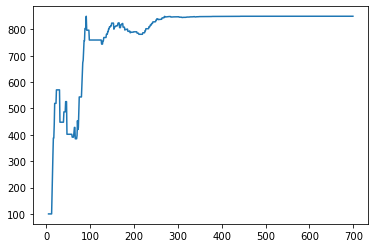

In [39]:
plt.plot(scores)
plt.show()